In [373]:
# Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as S

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.feature_selection import RFE

import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix as cm,accuracy_score as ac,roc_curve as ROC,roc_auc_score,precision_recall_curve

import warnings
warnings.filterwarnings('ignore')

In [235]:
df = pd.read_csv('Leads.csv')

In [236]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [238]:
df.shape

(9240, 37)

### Encoding Binary Variables

In [239]:
df.dtypes[df.dtypes == 'object']

Prospect ID                                      object
Lead Origin                                      object
Lead Source                                      object
Do Not Email                                     object
Do Not Call                                      object
Last Activity                                    object
Country                                          object
Specialization                                   object
How did you hear about X Education               object
What is your current occupation                  object
What matters most to you in choosing a course    object
Search                                           object
Magazine                                         object
Newspaper Article                                object
X Education Forums                               object
Newspaper                                        object
Digital Advertisement                            object
Through Recommendations                         

In [240]:
# Encoding Binary variables
df[['Do Not Email','Do Not Call','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview']] = df[['Do Not Email','Do Not Call','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview']].replace(('Yes','No'),(1,0))   

In [241]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,0,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,0,Select,Mumbai,02.Medium,01.High,13.0,17.0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,0,Select,Mumbai,02.Medium,01.High,15.0,18.0,0,0,Modified


### Updating the columns having values as 'select' to NaN

In [242]:
df[['Lead Origin','Lead Source','Last Activity','Country','Specialization','How did you hear about X Education','What is your current occupation','What matters most to you in choosing a course','Lead Quality','Lead Profile','City','Asymmetrique Activity Index','Asymmetrique Profile Index','Last Notable Activity']]=df[['Lead Origin','Lead Source','Last Activity','Country','Specialization','How did you hear about X Education','What is your current occupation','What matters most to you in choosing a course','Lead Quality','Lead Profile','City','Asymmetrique Activity Index','Asymmetrique Profile Index','Last Notable Activity']].replace('Select',np.NaN)

In [243]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,0,NaN,NaN,02.Medium,02.Medium,15.0,15.0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,0,NaN,NaN,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,0,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,0,NaN,Mumbai,02.Medium,01.High,13.0,17.0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,0,NaN,Mumbai,02.Medium,01.High,15.0,18.0,0,0,Modified


### Missing values

In [244]:
for col in df.columns:
    Missing_percent = round(df[col].isnull().sum()/len(df) * 100,2)
    print('Miss_value_{0}'.format(col),Missing_percent)

Miss_value_Prospect ID 0.0
Miss_value_Lead Number 0.0
Miss_value_Lead Origin 0.0
Miss_value_Lead Source 0.39
Miss_value_Do Not Email 0.0
Miss_value_Do Not Call 0.0
Miss_value_Converted 0.0
Miss_value_TotalVisits 1.48
Miss_value_Total Time Spent on Website 0.0
Miss_value_Page Views Per Visit 1.48
Miss_value_Last Activity 1.11
Miss_value_Country 26.63
Miss_value_Specialization 36.58
Miss_value_How did you hear about X Education 78.46
Miss_value_What is your current occupation 29.11
Miss_value_What matters most to you in choosing a course 29.32
Miss_value_Search 0.0
Miss_value_Magazine 0.0
Miss_value_Newspaper Article 0.0
Miss_value_X Education Forums 0.0
Miss_value_Newspaper 0.0
Miss_value_Digital Advertisement 0.0
Miss_value_Through Recommendations 0.0
Miss_value_Receive More Updates About Our Courses 0.0
Miss_value_Tags 36.29
Miss_value_Lead Quality 51.59
Miss_value_Update me on Supply Chain Content 0.0
Miss_value_Get updates on DM Content 0.0
Miss_value_Lead Profile 74.19
Miss_value_C

In [245]:
df['Lead Quality'].value_counts()

Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

#### Lead Quality column seems to be an important feature in prediction of Lead conversion.  so let us convert the NaN values to 'Not Sure' as the values are unknown

In [246]:
df['Lead Quality'] = df['Lead Quality'].replace(np.NaN,'Not Sure')

#### Missing values Treatment

In [247]:
# Dropping the columns having more than 45% of missing values
df=df.drop(['How did you hear about X Education','Lead Profile','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'],axis=1)


In [248]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,0,0,Interested in other courses,Low in Relevance,0,0,NaN,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,0,0,Ringing,Not Sure,0,0,NaN,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,0,0,Will revert after reading the email,Might be,0,0,Mumbai,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,0,0,Ringing,Not Sure,0,0,Mumbai,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,0,0,Will revert after reading the email,Might be,0,0,Mumbai,0,0,Modified


In [249]:
df.shape

(9240, 31)

In [250]:
# Imputation of missing values
df['Specialization'] = df['Specialization'].replace(np.NaN,'others')
df['Country'] = df['Country'].replace(np.NaN,S.mode(df['Country']))
df['What is your current occupation'] = df['What is your current occupation'].replace(np.NaN,'Others')
df['What matters most to you in choosing a course'] = df['What matters most to you in choosing a course'].replace(np.NaN,S.mode(df['What matters most to you in choosing a course']))
df['Tags'] = df['Tags'].replace(np.NaN,'Will revert after reading the email')
df['City'] = df['City'].replace(np.NaN,'Mumbai')

In [251]:
# Dropping the rows of the columns having less than 2% missing values
df.dropna(inplace=True)

In [252]:
df.isnull().sum()

Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                      

In [253]:
df.shape

(9074, 31)

#### Data cleaning

In [254]:
df['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Live Chat               2
Social Media            2
Press_Release           2
Pay per Click Ads       1
youtubechannel          1
welearnblog_Home        1
testone                 1
blog                    1
NC_EDM                  1
WeLearn                 1
Name: Lead Source, dtype: int64

In [255]:
#Data cleaning
df['Lead Source'] = df['Lead Source'].replace('Google','google')

### Exploratory Data Analysis


In [256]:
df['Converted'].value_counts()

0    5639
1    3435
Name: Converted, dtype: int64

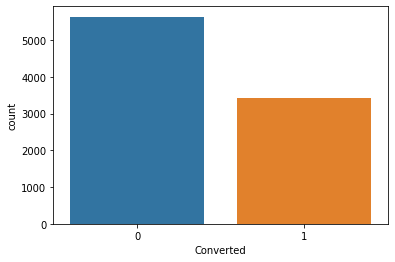

In [257]:
sns.countplot(df['Converted'])

In [258]:
round(len(df[df['Converted']==1])/len(df)*100,2)

37.86

#### Conversion rate is of 37.86% of the total data. The data seems to be pretty balanced.

In [259]:
df['Lead Source'].value_counts()

google               2873
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
Click2call              4
Social Media            2
Press_Release           2
Live Chat               2
Pay per Click Ads       1
youtubechannel          1
welearnblog_Home        1
testone                 1
blog                    1
NC_EDM                  1
WeLearn                 1
Name: Lead Source, dtype: int64

In [260]:
df=df.replace(['Facebook','bing','Click2call','Live Chat','Social Media','Press_Release','WeLearn','welearnblog_Home','blog','Pay per Click Ads','testone','NC_EDM','youtubechannel'],'Others')

In [261]:
df['Lead Source'].value_counts()

google              2873
Direct Traffic      2543
Olark Chat          1753
Organic Search      1154
Reference            443
Welingak Website     129
Referral Sites       125
Others                54
Name: Lead Source, dtype: int64

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

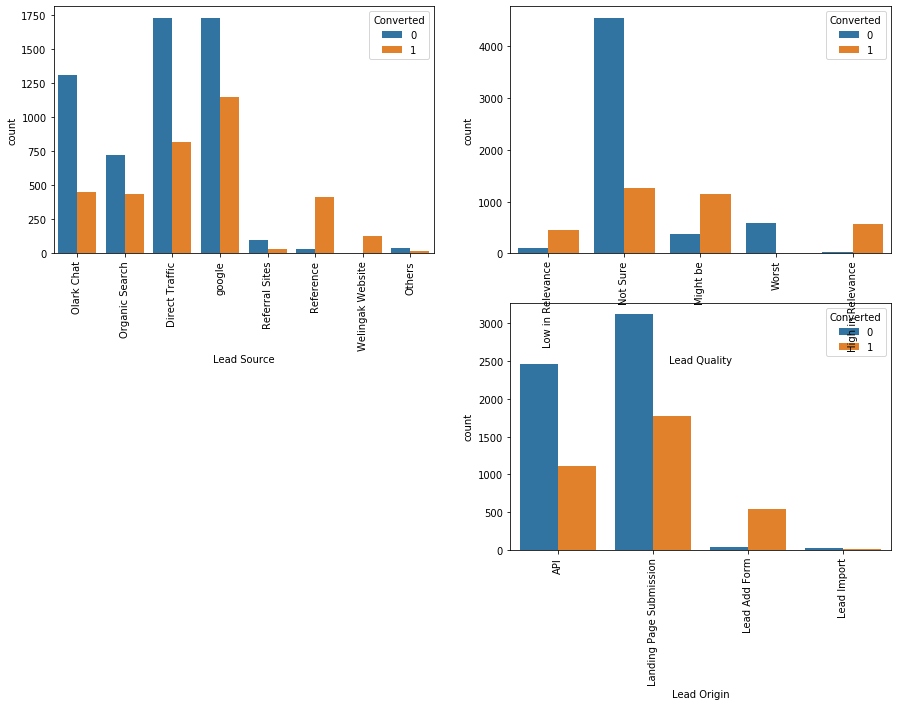

In [262]:
# Lead Origin, Lead Quality, Lead Source
plt.figure(figsize=(15,10))

plt.subplot(221)
sns.countplot(df['Lead Source'],hue=df['Converted'])
plt.xticks(rotation=90)

plt.subplot(224)
sns.countplot(df['Lead Origin'],hue=df['Converted'])
plt.xticks(rotation=90)

plt.subplot(222)
sns.countplot(df['Lead Quality'],hue=df['Converted'])
plt.xticks(rotation=90)

#### 1. Lead Source - The possiblity of conversion to hot leads can be observed more in google , Direct Traffic. Hence the company can enhance the views or advertisements more in google and Direct Traffic. Though the count of lead is less,the conversion rate can be seen more in 'Reference'. They can increase the discount rate for the reference.

#### 2. Lead Quality - The Number of leads is more in'Not Sure',but conversion rate is less. But the Lead count is less and the conversion rate is more in 'Might be','High Relevance' and 'Low Relevance'.
#### So the Marketing team can approach often and canvas the leads who select 'Might be','High Relevance' and 'Not Sure'.

#### 3. Lead Origin - Count of leads is more in 'Landing Page Submission' followed by 'API', but the conversion rate is on lower side. Whereas the conversion rate in 'Lead Add Form' is considerably high even though the lead count is less.

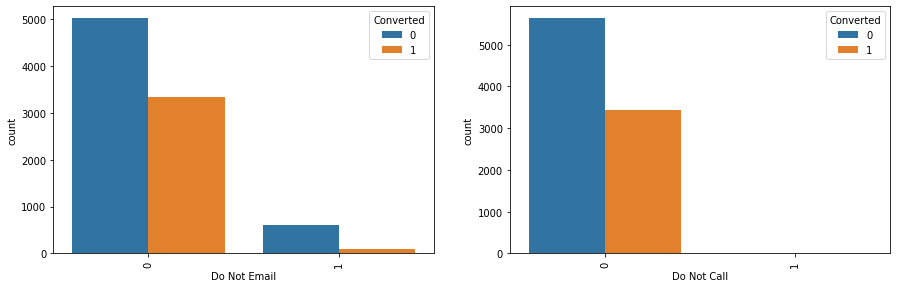

In [263]:
# Do Not Email/Do Not Call

plt.figure(figsize=(15,10))

plt.subplot(221)
sns.countplot(df['Do Not Email'],hue=df['Converted'])
plt.xticks(rotation=90)

plt.subplot(222)
sns.countplot(df['Do Not Call'],hue=df['Converted'])
plt.xticks(rotation=90)

plt.show()

In [264]:
df['Do Not Call'].value_counts()

0    9072
1       2
Name: Do Not Call, dtype: int64

In [265]:
df['Do Not Email'].value_counts()

0    8358
1     716
Name: Do Not Email, dtype: int64

#### 1. 'Do Not Call' is opted by very less people. So the feature 'Do Not Call' can be removed.

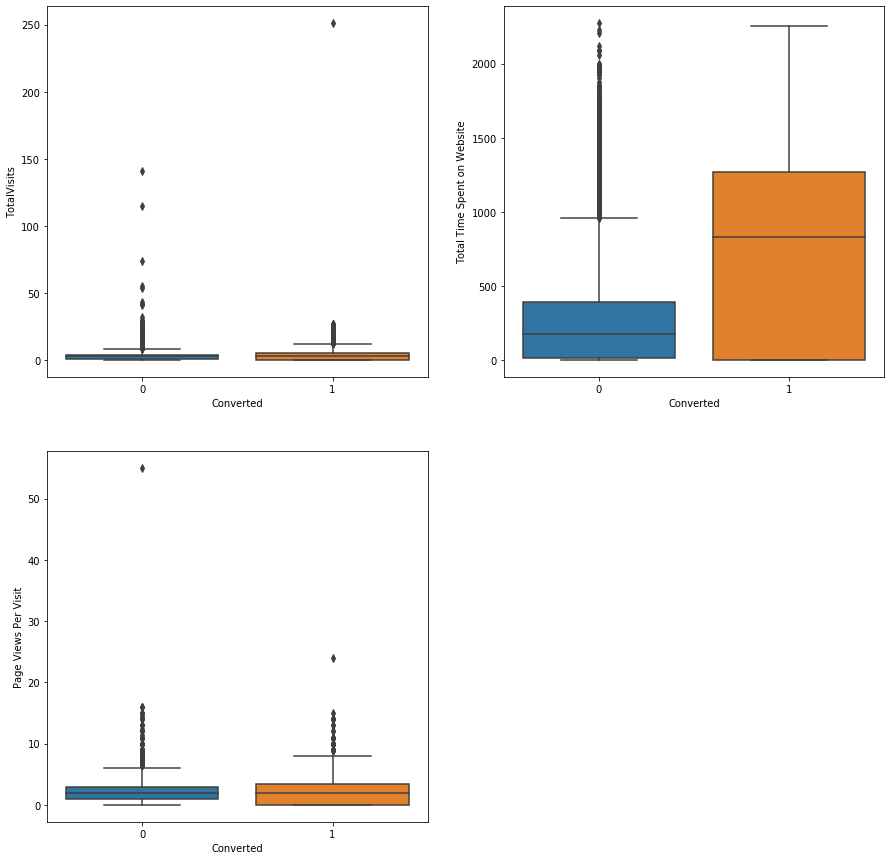

In [266]:
# Total Visits, Total Time Spent on Website, Page Views per visit

plt.figure(figsize=(15,15))
plt.subplot(221)
#plt.ylim(0,10)
sns.boxplot(x=df['Converted'],y=df['TotalVisits'])

plt.subplot(222)
sns.boxplot(x=df['Converted'],y=df['Total Time Spent on Website'])

plt.subplot(223)
sns.boxplot(x=df['Converted'],y=df['Page Views Per Visit'])

In [267]:
df['TotalVisits'].quantile([0.25,0.50,0.75,0.95,0.99])

0.25     1.0
0.50     3.0
0.75     5.0
0.95    10.0
0.99    17.0
Name: TotalVisits, dtype: float64

In [268]:
df['TotalVisits'].max()

251.0

In [269]:
df['Total Time Spent on Website'].quantile([0.25,0.50,0.75,0.95,0.99])

0.25      11.00
0.50     246.00
0.75     922.75
0.95    1557.00
0.99    1839.00
Name: Total Time Spent on Website, dtype: float64

In [270]:
df['Total Time Spent on Website'].max()

2272

In [271]:
df['Page Views Per Visit'].quantile([0.25,0.50,0.75,0.95,0.99])

0.25    1.0
0.50    2.0
0.75    3.2
0.95    6.0
0.99    9.0
Name: Page Views Per Visit, dtype: float64

In [272]:
df['Page Views Per Visit'].max()

55.0

#### 1. Total Visits and Pages per view visit - The median of both hot and cold leads seems to be same. So nothing can be inferred from this.
#### 2. Total Time spent on website - The conversion rate of 'Total Time Spent on Website' is more. The website can be made still more appealing to the users to stay more time.

In [273]:
df['Last Activity'].value_counts()

Email Opened                    3432
SMS Sent                        2716
Olark Chat Conversation          972
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    312
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       90
Unsubscribed                      59
Had a Phone Conversation          25
View in browser link Clicked       6
Approached upfront                 5
Email Received                     2
Email Marked Spam                  2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [274]:
df = df.replace(['Unsubscribed','Had a Phone Conversation','View in browser link Clicked','Approached upfront','Email Received',
         'Email Marked Spam','Visited Booth in Tradeshow','Resubscribed to emails'],'Others')

In [275]:
df['Last Activity'].value_counts

<bound method IndexOpsMixin.value_counts of 0       Page Visited on Website
1                  Email Opened
2                  Email Opened
3                   Unreachable
4             Converted to Lead
                 ...           
9235                     Others
9236                   SMS Sent
9237                   SMS Sent
9238                   SMS Sent
9239                   SMS Sent
Name: Last Activity, Length: 9074, dtype: object>

In [276]:
df['Specialization'].value_counts()

others                               3282
Finance Management                    959
Human Resource Management             837
Marketing Management                  823
Operations Management                 499
Business Administration               399
IT Projects Management                366
Supply Chain Management               346
Banking, Investment And Insurance     335
Media and Advertising                 202
Travel and Tourism                    202
International Business                176
Healthcare Management                 156
E-COMMERCE                            111
Hospitality Management                111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [277]:
df = df.replace(['Rural and Agribusiness','E-Business','Services Excellence'],'Other Business')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

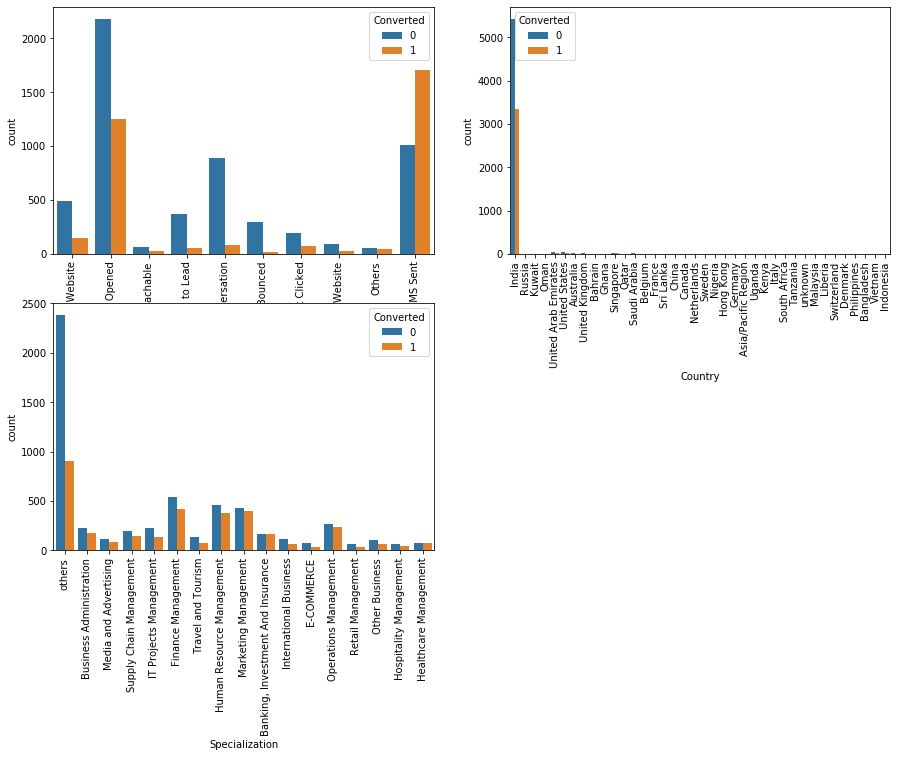

In [278]:
# Last Activity, Country and Specialization
plt.figure(figsize=(15,10))
plt.subplot(221)
sns.countplot(df['Last Activity'],hue=df['Converted'])
plt.xticks(rotation=90)

plt.subplot(222)
sns.countplot(df['Country'],hue=df['Converted'])
plt.xticks(rotation=90)

plt.subplot(223)
sns.countplot(df['Specialization'],hue=df['Converted'])
plt.xticks(rotation=90)

#### 1. Last Activity - Overall Lead count is more in  'Emails opened' followed by 'SMS sent'. The conversion rate is more for 'SMS Sent'. The company can approach by calling those whose last activity is 'SMS sent' and 'Emails opened' to increase the conversion rate.
#### 2. Country - The data is highly skewed. This feature can be removed.
#### 3. Specialization - Other has more leads , but conversion rate is less. Conversion rate is high in Marketing Management and Operations Management.

In [279]:
df = df.replace(['Housewife','Businessman','Other'],'Others')
df = df.replace('Flexibility & Convenience','Others')

(array([0, 1]), <a list of 2 Text xticklabel objects>)

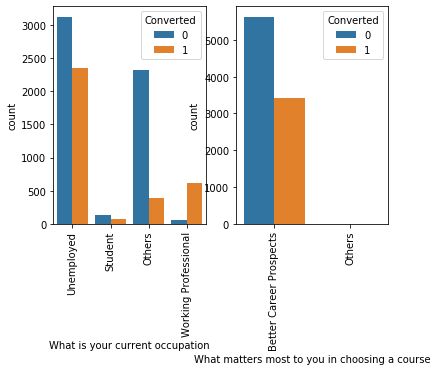

In [280]:
# What is your current occupation, What matters most to you in choosing a course

plt.subplot(121)
sns.countplot(df['What is your current occupation'],hue=df['Converted'])
plt.xticks(rotation=90)


plt.subplot(122)
sns.countplot(df['What matters most to you in choosing a course'],hue=df['Converted'])
plt.xticks(rotation=90)

#### 1. What is your current occupation - Lead count is more in unemployment followed by others. The conversion rate is seen more in Working Professional followed by unemployed. The company can reach the working professionals through websites like 'Linkedin','Github' etc and can give discounts with job offers for Unemployed.

#### 2. What matters most to you in choosing a course - The data is highly skewed. This feature can be removed.

(array([0]), <a list of 1 Text xticklabel objects>)

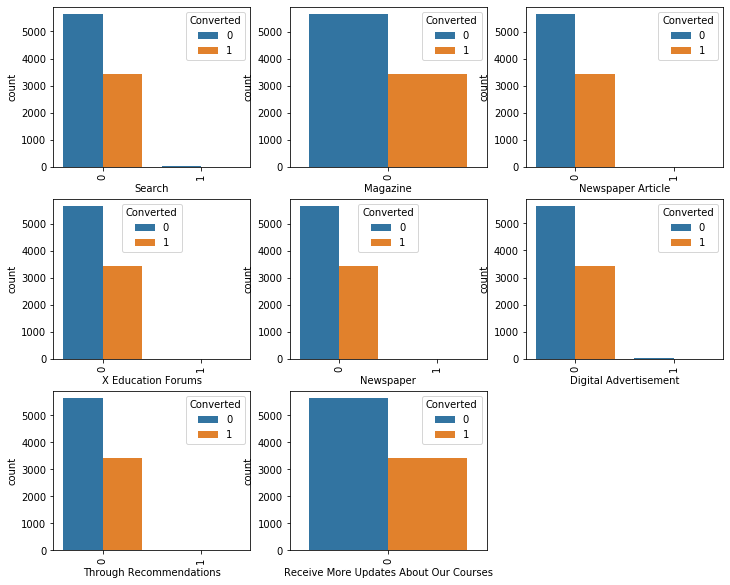

In [281]:
plt.figure(figsize=(12,10))
plt.subplot(331)
sns.countplot(df['Search'],hue=df['Converted'])
plt.xticks(rotation=90)

plt.subplot(332)
sns.countplot(df['Magazine'],hue=df['Converted'])
plt.xticks(rotation=90)

plt.subplot(333)
sns.countplot(df['Newspaper Article'],hue=df['Converted'])
plt.xticks(rotation=90)

plt.subplot(334)
sns.countplot(df['X Education Forums'],hue=df['Converted'])
plt.xticks(rotation=90)

plt.subplot(335)
sns.countplot(df['Newspaper'],hue=df['Converted'])
plt.xticks(rotation=90)

plt.subplot(336)
sns.countplot(df['Digital Advertisement'],hue=df['Converted'])
plt.xticks(rotation=90)

plt.subplot(337)
sns.countplot(df['Through Recommendations'],hue=df['Converted'])
plt.xticks(rotation=90)

plt.subplot(338)
sns.countplot(df['Receive More Updates About Our Courses'],hue=df['Converted'])
plt.xticks(rotation=90)

#### All the above data are highly skewed and have high variance. Nothing can be inferred from the above data and these features can be removed. 

(array([0, 1]), <a list of 2 Text xticklabel objects>)

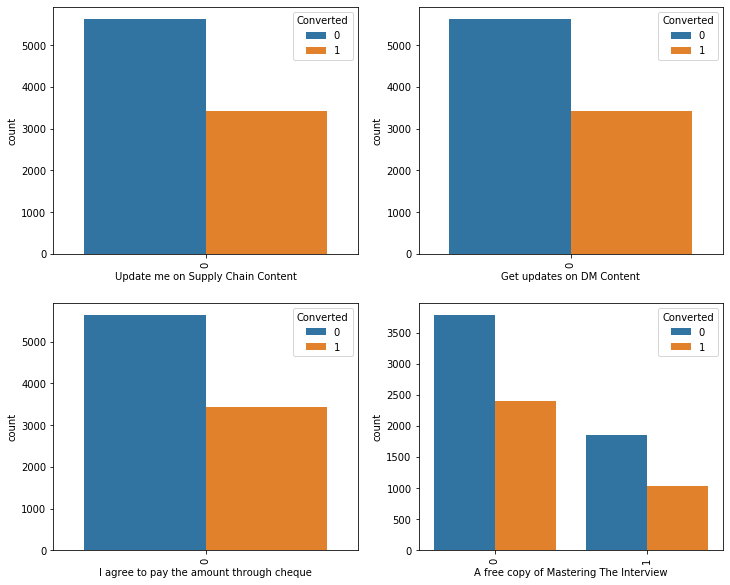

In [282]:
plt.figure(figsize=(12,10))
plt.subplot(221)
sns.countplot(df['Update me on Supply Chain Content'],hue=df['Converted'])
plt.xticks(rotation=90)

plt.subplot(222)
sns.countplot(df['Get updates on DM Content'],hue=df['Converted'])
plt.xticks(rotation=90)

plt.subplot(223)
sns.countplot(df['I agree to pay the amount through cheque'],hue=df['Converted'])
plt.xticks(rotation=90)

plt.subplot(224)
sns.countplot(df['A free copy of Mastering The Interview'],hue=df['Converted'])
plt.xticks(rotation=90)

#### All the above data are highly skewed and have high variance. Nothing can be inferred from the above data and these features can be removed. 

In [283]:
df = df.replace(['Others','Email Bounced','Unreachable','Form Submitted on Website'],'Other Activities')

In [284]:
df['Last Notable Activity'].value_counts()

Modified                   3267
Email Opened               2823
SMS Sent                   2152
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Other Activities            158
Name: Last Notable Activity, dtype: int64

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000.]),
 <a list of 7 Text xticklabel objects>)

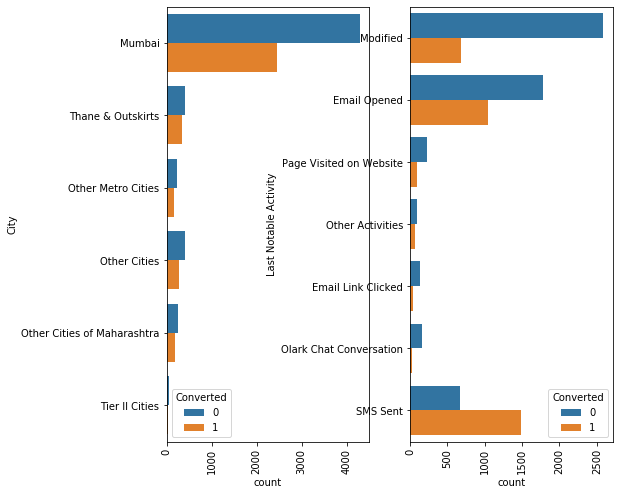

In [285]:
plt.figure(figsize=(8,8))


plt.subplot(121)
plt.subplots_adjust(hspace=3.0)
sns.countplot(y=df['City'],hue=df['Converted'])
plt.xticks(rotation=90)

plt.subplot(122)
sns.countplot(y=df['Last Notable Activity'],hue=df['Converted'])
plt.xticks(rotation=90)

#### 1. city - Highly skewed. Nothing can be inferred. This feature can be removed.
#### 2. Last Notable Activity - Lead count is more in 'Modified' 

In [286]:
df['Tags'].value_counts()

Will revert after reading the email                  5343
Ringing                                              1187
Interested in other courses                           509
Already a student                                     465
Closed by Horizzon                                    301
switched off                                          240
Busy                                                  185
Lost to EINS                                          172
Not doing further education                           145
Interested  in full time MBA                          116
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    25
in touch with EINS                                     12
Lost to Others

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000.]),
 <a list of 7 Text xticklabel objects>)

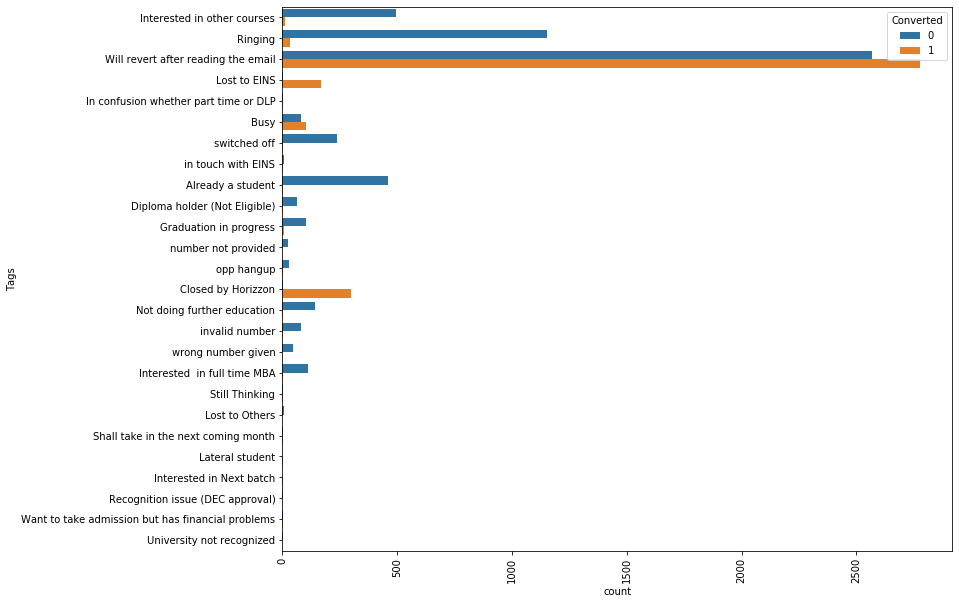

In [287]:
plt.figure(figsize=(12,10))
sns.countplot(y=df['Tags'],hue=df['Converted'])
plt.xticks(rotation=90)

#### Lead count and conversion rate is high in 'Will revert after reading the email'. Also there is notable conversion rate in 'Closed by Horizzon'.
#### The company can track those whose tag as 'Will revert after reading the email' for higher conversion.

In [288]:
#Dropping few columns as they are not much important for this analysis.

df = df.drop(['Prospect ID','Lead Number','Do Not Call','Country','City','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums',
             'Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
             'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview','Last Notable Activity'],axis=1)

In [289]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,others,Unemployed,Interested in other courses,Low in Relevance
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,others,Unemployed,Ringing,Not Sure
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Other Activities,Media and Advertising,Unemployed,Ringing,Not Sure
4,Landing Page Submission,google,0,1,2.0,1428,1.0,Converted to Lead,others,Unemployed,Will revert after reading the email,Might be


In [290]:
df.shape

(9074, 12)

### Dummy Variable

In [291]:
df_dummy = pd.get_dummies(df[['Lead Origin','Lead Source','Last Activity',
                           'Specialization','What is your current occupation','Tags','Lead Quality']],drop_first=True)

In [292]:
df_dummy.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Activities,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Lead Source_google,...,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [293]:
df = df.drop(['Lead Origin','Lead Source','Last Activity',
                           'Specialization','What is your current occupation','Tags','Lead Quality'],axis=1)

In [294]:
df.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0,0,0,0.0,0,0.0
1,0,0,5.0,674,2.5
2,0,1,2.0,1532,2.0
3,0,0,1.0,305,1.0
4,0,1,2.0,1428,1.0


In [295]:
df = pd.concat([df,df_dummy],axis=1)

In [296]:
df.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Olark Chat,Lead Source_Organic Search,...,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst
0,0,0,0.0,0,0.0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,0,1,2.0,1532,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,2.0,1428,1.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### Train test split

In [297]:
x = df.drop('Converted',axis=1)
y = df['Converted']

In [298]:
x.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Activities,...,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst
0,0,0.0,0,0.0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,5.0,674,2.5,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0,2.0,1532,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,2.0,1428,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [299]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=100)

### Feature Scaling

In [300]:
s= StandardScaler()
x_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = s.fit_transform(x_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [301]:
x_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Activities,...,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst
3009,0,-0.284595,-0.160255,-0.179666,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1012,1,-0.284595,-0.540048,-0.179666,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9226,0,-0.671384,-0.888650,-1.132538,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4750,0,-0.284595,1.643304,-0.179666,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7987,0,0.295588,2.017593,0.058552,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### Correlation matrix

In [302]:
df.corr()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Olark Chat,Lead Source_Organic Search,...,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst
Do Not Email,1.000000,-0.140786,0.035715,-0.046192,0.036403,0.099661,-0.031468,-0.016857,-0.051070,0.035510,...,-0.010651,0.049168,0.062603,0.002690,0.028181,0.069996,-0.047507,-0.055689,0.045019,0.097930
Converted,-0.140786,1.000000,0.032855,0.359261,0.000260,-0.037481,0.300775,-0.009328,-0.124085,-0.000581,...,-0.009645,-0.072602,-0.041023,-0.035829,-0.122980,-0.056317,0.231659,0.349936,-0.443920,-0.196901
TotalVisits,0.035715,0.032855,1.000000,0.219723,0.511068,0.290347,-0.169742,-0.037808,-0.312573,0.193606,...,-0.005288,0.008613,0.001125,0.004127,0.014920,0.015663,0.009311,0.035439,-0.023753,-0.024451
Total Time Spent on Website,-0.046192,0.359261,0.219723,1.000000,0.318350,0.292571,-0.188526,-0.050742,-0.378626,0.100986,...,-0.002534,-0.025133,0.006651,-0.008171,-0.026851,-0.013326,0.103040,0.157334,-0.189357,-0.066640
Page Views Per Visit,0.036403,0.000260,0.511068,0.318350,1.000000,0.484119,-0.268415,-0.056068,-0.503658,0.304414,...,-0.008339,0.028178,0.010943,0.013654,0.047503,0.029453,0.016591,0.065267,-0.040436,-0.026836
Lead Origin_Landing Page Submission,0.099661,-0.037481,0.290347,0.292571,0.484119,1.000000,-0.282445,-0.062195,-0.528424,0.050919,...,-0.014965,0.044854,0.036021,0.030240,0.067222,0.032944,0.004311,0.072384,-0.076290,0.049291
Lead Origin_Lead Add Form,-0.031468,0.300775,-0.169742,-0.188526,-0.268415,-0.282445,1.000000,-0.015064,-0.125706,-0.099838,...,-0.009518,-0.025130,-0.013748,-0.015802,-0.043111,-0.018873,0.060816,0.113034,-0.200453,-0.067849
Lead Origin_Lead Import,-0.016857,-0.009328,-0.037808,-0.050742,-0.056068,-0.062195,-0.015064,1.000000,-0.028183,-0.021985,...,-0.002096,-0.005534,-0.003027,-0.003480,0.002471,0.022589,-0.006710,-0.005256,0.007217,-0.015339
Lead Source_Olark Chat,-0.051070,-0.124085,-0.312573,-0.378626,-0.503658,-0.528424,-0.125706,-0.028183,1.000000,-0.186787,...,0.005236,-0.020627,-0.020395,-0.015652,-0.054562,-0.023643,-0.055184,-0.119972,0.158365,0.004370
Lead Source_Organic Search,0.035510,-0.000581,0.193606,0.100986,0.304414,0.050919,-0.099838,-0.021985,-0.186787,1.000000,...,-0.004789,0.036289,0.011489,0.009908,0.040150,0.013929,0.004537,0.011358,0.001111,-0.013877


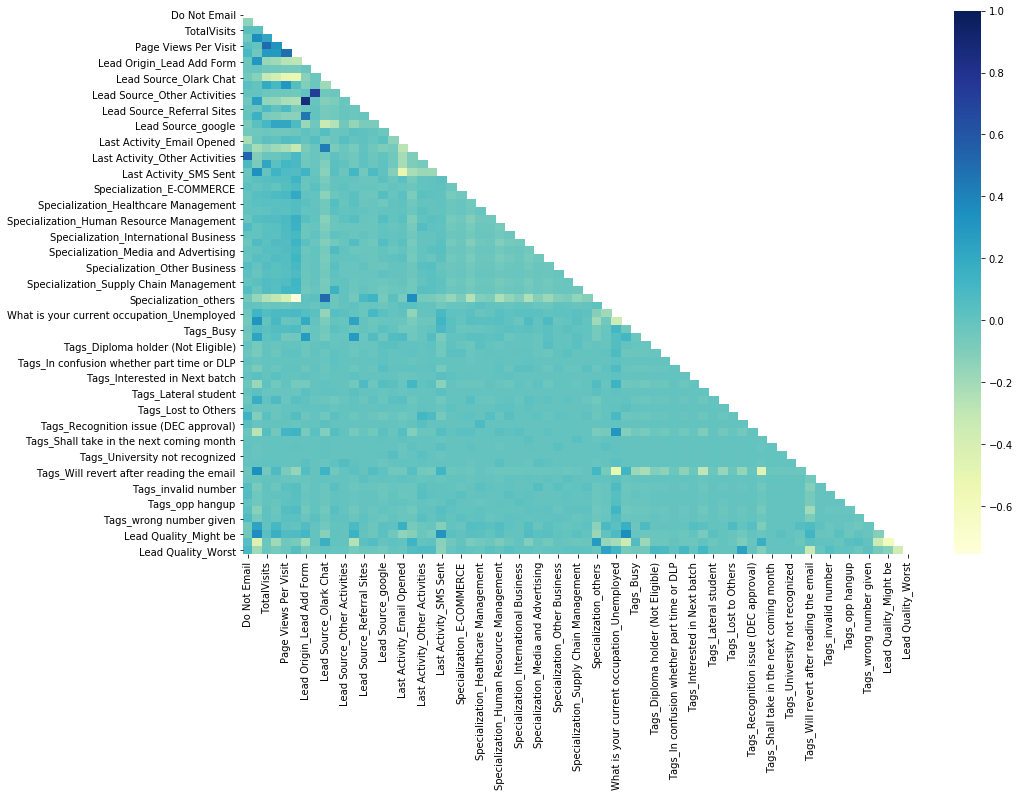

In [303]:
plt.figure(figsize=(15,10))

mask = np.triu(np.ones_like(df.corr()))

sns.heatmap(df.corr(),cmap="YlGnBu",mask=mask)

In [304]:
conv_corr  = df.corr()

conv_corr_unstacked = conv_corr.unstack().sort_values(kind='quicksort')
conv_corr.where(np.triu(np.ones(conv_corr.shape),k=1).astype(np.bool)).stack().sort_values(ascending=False).head(10)

Lead Origin_Lead Add Form                             Lead Source_Reference                    0.866191
Lead Origin_Lead Import                               Lead Source_Other Activities             0.744366
Do Not Email                                          Last Activity_Other Activities           0.525586
TotalVisits                                           Page Views Per Visit                     0.511068
Lead Source_Olark Chat                                Specialization_others                    0.509466
Page Views Per Visit                                  Lead Origin_Landing Page Submission      0.484119
Lead Origin_Lead Add Form                             Lead Source_Welingak Website             0.459142
Lead Source_Olark Chat                                Last Activity_Olark Chat Conversation    0.424419
Converted                                             Total Time Spent on Website              0.359261
What is your current occupation_Working Professional  Lead Quali

#### Removing the highly correlated features ( correlation having more than 50%)

In [305]:
df = df.drop(['Lead Origin_Lead Add Form','Lead Origin_Lead Import','Last Activity_Other Activities','Page Views Per Visit','Lead Source_Olark Chat'],axis=1)      

In [306]:
x_train = x_train.drop(['Lead Origin_Lead Add Form','Lead Origin_Lead Import','Last Activity_Other Activities','Page Views Per Visit','Lead Source_Olark Chat'],axis=1)      

In [307]:
x_test = x_test.drop(['Lead Origin_Lead Add Form','Lead Origin_Lead Import','Last Activity_Other Activities','Page Views Per Visit','Lead Source_Olark Chat'],axis=1)      

In [308]:
conv_corr = x_train.corr()

In [309]:
conv_corr.where(np.triu(np.ones(conv_corr.shape),k=1).astype(np.bool)).stack().sort_values(ascending=False).head(10)

What is your current occupation_Working Professional  Lead Quality_Might be                                   0.349263
Last Activity_Olark Chat Conversation                 Specialization_others                                   0.345955
Last Activity_SMS Sent                                Lead Quality_Might be                                   0.326231
What is your current occupation_Unemployed            Tags_Ringing                                            0.305642
Total Time Spent on Website                           Lead Origin_Landing Page Submission                     0.287445
Specialization_others                                 Lead Quality_Not Sure                                   0.280514
TotalVisits                                           Lead Origin_Landing Page Submission                     0.269443
Lead Source_Reference                                 Tags_Closed by Horizzon                                 0.263936
                                                

### Model Building

In [310]:
ML1 = sm.GLM(y_train,(sm.add_constant(x_train)), family = sm.families.Binomial())

In [311]:
ML1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6287
Model Family:                Binomial   Df Model:                           63
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1087.9
Date:                Tue, 15 Nov 2022   Deviance:                       2175.9
Time:                        17:16:12   Pearson chi2:                 1.66e+04
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -4.6083      0.962     -4.791      0.000      -6.493      -2.723
Do Not Email                                              -1.5927      0.278     -5.735      0.000      -2.137      -1.048
TotalVisits                                                0.1261      0.035      3.555      0.000       0.057       0.196
Total Time Spent on Website                                1.0406      0.063     16.484      0.000       0.917       1.164
Lead Origin_Landing Page Submission                       -1.2570      0.213     -5.911      0.000      -1.674      -0.840
Lead Source_Organic Search                                -0.2757      0.186     -1.484      0.138      -0.640       0.088
Lead Source_Other Activities                              -0.3837      0.636     -0.603      0.546      -1.630       0.862
Lead Source_Reference                                      0.6921      0.457      1.514      0.130      -0.204       1.588
Lead Source_Referral Sites                                -0.3223      0.515     -0.626      0.531      -1.331       0.686
Lead Source_Welingak Website                               2.6169      0.749      3.494      0.000       1.149       4.085
Lead Source_google                                        -0.2298      0.132     -1.740      0.082      -0.489       0.029
Last Activity_Email Link Clicked                           0.1864      0.415      0.449      0.654      -0.628       1.001
Last Activity_Email Opened                                 0.4994      0.228      2.186      0.029       0.052       0.947
Last Activity_Olark Chat Conversation                     -1.0647      0.315     -3.382      0.001      -1.682      -0.448
Last Activity_Page Visited on Website                      0.0366      0.324      0.113      0.910      -0.599       0.672
Last Activity_SMS Sent                                     2.4100      0.229     10.515      0.000       1.961       2.859
Specialization_Business Administration                    -0.0633      0.408     -0.155      0.877      -0.862       0.736
Specialization_E-COMMERCE                                  0.1678      0.621      0.270      0.787      -1.049       1.385
Specialization_Finance Management                         -0.2654      0.361     -0.736      0.462      -0.973       0.442
Specialization_Healthcare Management                       0.1818      0.541      0.336      0.737      -0.878       1.242
Specialization_Hospitality Management                     -0.3332      0.575     -0.579      0.562      -1.461       0.794
Specialization_Human Resource Management                  -0.1529      0.362     -0.423      0.673      -0.862       0.556
Speciali

In [312]:
LR = LogisticRegression()

In [313]:
rfe = RFE(LR,15)
rfe.fit(x_train,y_train)

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='auto', n_jobs=None, penalty='l2',
                                 random_state=None, solver='lbfgs', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=15, step=1, verbose=0)

In [314]:
rfe.support_

array([ True, False, False, False, False, False, False, False,  True,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True,  True,  True,  True,
       False, False, False, False, False, False, False,  True, False,
       False, False,  True, False, False, False, False,  True, False,
        True, False, False,  True, False, False, False,  True,  True])

In [315]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 38),
 ('Total Time Spent on Website', False, 6),
 ('Lead Origin_Landing Page Submission', False, 13),
 ('Lead Source_Organic Search', False, 29),
 ('Lead Source_Other Activities', False, 28),
 ('Lead Source_Reference', False, 5),
 ('Lead Source_Referral Sites', False, 30),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_google', False, 31),
 ('Last Activity_Email Link Clicked', False, 37),
 ('Last Activity_Email Opened', False, 20),
 ('Last Activity_Olark Chat Conversation', False, 2),
 ('Last Activity_Page Visited on Website', False, 49),
 ('Last Activity_SMS Sent', True, 1),
 ('Specialization_Business Administration', False, 35),
 ('Specialization_E-COMMERCE', False, 27),
 ('Specialization_Finance Management', False, 44),
 ('Specialization_Healthcare Management', False, 25),
 ('Specialization_Hospitality Management', False, 41),
 ('Specialization_Human Resource Management', False, 46),
 ('Specialization_IT Projects Manage

In [316]:
col = x_train.columns[rfe.support_]

In [317]:
x_train.columns[~rfe.support_]

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Source_Organic Search',
       'Lead Source_Other Activities', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_google',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'Specialization_Business Administration', 'Specialization_E-COMMERCE',
       'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management', 'Specialization_Other Business',
       'Specialization_Retail Management',

In [318]:
x_train_sm = sm.add_constant(x_train[col])
ML2 = sm.GLM(y_train, x_train_sm, family = sm.families.Binomial())
res = ML2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1340.3
Date:                Tue, 15 Nov 2022   Deviance:                       2680.5
Time:                        17:16:14   Pearson chi2:                 1.29e+04
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -5.5617      0.263    -21.111      0.000      -6.078      -5.045
Do Not Email                                            -1.6589      0.229     -7.240      0.000      -2.108      -1.210
Lead Source_Welingak Website                             2.3081      0.736      3.135      0.002       0.865       3.751
Last Activity_SMS Sent                                   2.1793      0.115     18.906      0.000       1.953       2.405
What is your current occupation_Student                  2.9152      0.445      6.544      0.000       2.042       3.788
What is your current occupation_Unemployed               3.1732      0.133     23.779      0.000       2.912       3.435
What is your current occupation_Working Professional     3.8440      0.314     12.251      0.000       3.229       4.459
Tags_Busy                                                2.7995      0.297      9.440      0.000       2.218       3.381
Tags_Closed by Horizzon                                  7.5975      0.746     10.183      0.000       6.135       9.060
Tags_Lost to EINS                                       10.2184      0.778     13.141      0.000       8.694      11.742
Tags_Ringing                                            -1.4737      0.307     -4.795      0.000      -2.076      -0.871
Tags_Will revert after reading the email                 4.8208      0.214     22.578      0.000       4.402       5.239
Tags_invalid number                                    -21.9295   1.44e+04     -0.002      0.999   -2.82e+04    2.82e+04
Tags_switched off                                       -1.7222      0.562     -3.066      0.002      -2.823      -0.621
Lead Quality_Not Sure                                   -1.7850      0.148    -12.047      0.000      -2.075      -1.495
Lead Quality_Worst                                      -3.5988      0.938     -3.836      0.000      -5.438      -1.760
========================================================================================================================
"""

In [319]:
vif = pd.DataFrame()
vif['Features'] = x_train_sm.columns
vif['VIF'] = [variance_inflation_factor(x_train_sm.values,i) for i in range(x_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending=False)
vif

,Features,VIF
0,const,33.06
11,Tags_Will revert after reading the email,3.45
5,What is your current occupation_Unemployed,2.63
14,Lead Quality_Not Sure,2.12
10,Tags_Ringing,1.89
15,Lead Quality_Worst,1.79
6,What is your current occupation_Working Profes...,1.75
8,Tags_Closed by Horizzon,1.38
4,What is your current occupation_Student,1.27
13,Tags_switched off,1.20


In [320]:
col = col.drop('Tags_invalid number',1)

In [321]:
x_train_sm = sm.add_constant(x_train[col])
ML3 = sm.GLM(y_train, x_train_sm, family = sm.families.Binomial())
res = ML3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1344.7
Date:                Tue, 15 Nov 2022   Deviance:                       2689.5
Time:                        17:16:15   Pearson chi2:                 1.29e+04
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -5.6803      0.264    -21.506      0.000      -6.198      -5.163
Do Not Email                                            -1.6606      0.229     -7.262      0.000      -2.109      -1.212
Lead Source_Welingak Website                             2.3107      0.736      3.139      0.002       0.868       3.754
Last Activity_SMS Sent                                   2.1560      0.115     18.795      0.000       1.931       2.381
What is your current occupation_Student                  2.9294      0.448      6.533      0.000       2.050       3.808
What is your current occupation_Unemployed               3.1653      0.133     23.776      0.000       2.904       3.426
What is your current occupation_Working Professional     3.8628      0.316     12.221      0.000       3.243       4.482
Tags_Busy                                                2.9354      0.295      9.939      0.000       2.357       3.514
Tags_Closed by Horizzon                                  7.7179      0.746     10.342      0.000       6.255       9.181
Tags_Lost to EINS                                       10.3302      0.778     13.277      0.000       8.805      11.855
Tags_Ringing                                            -1.3307      0.306     -4.354      0.000      -1.930      -0.732
Tags_Will revert after reading the email                 4.9439      0.214     23.117      0.000       4.525       5.363
Tags_switched off                                       -1.5766      0.561     -2.813      0.005      -2.675      -0.478
Lead Quality_Not Sure                                   -1.7782      0.148    -12.025      0.000      -2.068      -1.488
Lead Quality_Worst                                      -3.5590      0.940     -3.787      0.000      -5.401      -1.717
========================================================================================================================
"""

In [322]:
vif = pd.DataFrame()
vif['Features'] = x_train_sm.columns
vif['VIF'] = [variance_inflation_factor(x_train_sm.values,i) for i in range(x_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending=False)
vif

,Features,VIF
0,const,32.78
11,Tags_Will revert after reading the email,3.35
5,What is your current occupation_Unemployed,2.63
13,Lead Quality_Not Sure,2.12
10,Tags_Ringing,1.84
14,Lead Quality_Worst,1.78
6,What is your current occupation_Working Profes...,1.75
8,Tags_Closed by Horizzon,1.37
4,What is your current occupation_Student,1.27
12,Tags_switched off,1.18


### Prediction

In [323]:
y_train_pred = res.predict(x_train_sm)
y_train_pred.head()

3009    0.074837
1012    0.422506
9226    0.030239
4750    0.411282
7987    0.999723
dtype: float64

In [324]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)

In [325]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.074837
1,0,0.422506
2,0,0.030239
3,1,0.411282
4,1,0.999723


In [326]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.074837,0
1,0,0.422506,0
2,0,0.030239,0
3,1,0.411282,0
4,1,0.999723,1


### Model Evaluation

In [327]:
CM = cm(y_train_pred_final.Converted, y_train_pred_final.Predicted )
CM

array([[3713,  192],
       [ 321, 2125]], dtype=int64)

In [328]:
accuracy = ac(y_train_pred_final.Converted, y_train_pred_final.Predicted)
accuracy

0.9192253188474256

In [329]:
# Substituting the value of true positive
TP = CM[1,1]
# Substituting the value of true negatives
TN = CM[0,0]
# Substituting the value of false positives
FP = CM[0,1] 
# Substituting the value of false negatives
FN = CM[1,0]

In [330]:
TP/(TP+FN)


0.8687653311529027

In [331]:
TN/(TN+FP)


0.9508322663252241

### ROC 

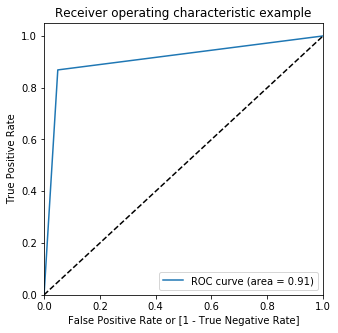

In [332]:
# Defining the function to plot the ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = ROC( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

# Calling the function
draw_roc(y_train_pred_final.Converted,y_train_pred_final.Predicted)

### Finding optimal cutoff value using tradeoff 

In [333]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x>i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.074837,0,1,0,0,0,0,0,0,0,0,0
1,0,0.422506,0,1,1,1,1,1,0,0,0,0,0
2,0,0.030239,0,1,0,0,0,0,0,0,0,0,0
3,1,0.411282,0,1,1,1,1,1,0,0,0,0,0
4,1,0.999723,1,1,1,1,1,1,1,1,1,1,1


In [334]:
# Creating accuracy,sensitivity,specificity for various values of cut-offs
cutoff_df = pd.DataFrame(columns=['Prob','Accuracy','Sens','Spec'])

from sklearn import metrics
num=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final[i])
    total1 = sum(sum(cm1))
    Accuracy = (cm1[0,0] + cm1[1,1])/total1
    Sens = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    Spec = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    cutoff_df.loc[i] = [ i, Accuracy, Sens, Spec]
print(cutoff_df)

     Prob  Accuracy      Sens      Spec
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.883955  0.952576  0.840973
0.2   0.2  0.909148  0.947261  0.885275
0.3   0.3  0.914029  0.939084  0.898335
0.4   0.4  0.912140  0.934178  0.898335
0.5   0.5  0.919225  0.868765  0.950832
0.6   0.6  0.919225  0.868357  0.951088
0.7   0.7  0.904897  0.779640  0.983355
0.8   0.8  0.903322  0.773508  0.984635
0.9   0.9  0.897811  0.758790  0.984891


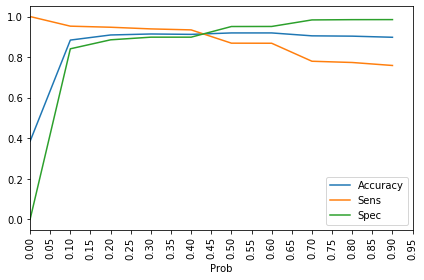

In [335]:
cutoff_df.plot.line(x='Prob',y=['Accuracy','Sens','Spec'])
plt.xticks(np.arange(0, 1, step=0.05), rotation = 90)
plt.tight_layout()
plt.show()

The cutoff point lies between 0.40 and 0.45 . Let us take the cut off point to 0.43

In [336]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.43 else 0)

In [337]:
y_train_pred_final['Predicted'].head()

0    0
1    0
2    0
3    0
4    1
Name: Predicted, dtype: int64

In [338]:
y_train_pred_final['Lead Score'] = y_train_pred_final.Conversion_Prob.map(lambda x: round(x*100))

In [339]:
y_train_pred_final['Lead Score'].head()

0      7
1     42
2      3
3     41
4    100
Name: Lead Score, dtype: int64

In [340]:
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Lead Score
0,0,0.074837,0,1,0,0,0,0,0,0,0,0,0,7
1,0,0.422506,0,1,1,1,1,1,0,0,0,0,0,42
2,0,0.030239,0,1,0,0,0,0,0,0,0,0,0,3
3,1,0.411282,0,1,1,1,1,1,0,0,0,0,0,41
4,1,0.999723,1,1,1,1,1,1,1,1,1,1,1,100


Finalizing the cut off point to 0.43 and let us calculate the metrics again

In [341]:
cm = cm(y_train_pred_final.Converted,y_train_pred_final.Predicted)
cm

array([[3713,  192],
       [ 321, 2125]], dtype=int64)

In [342]:
TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]

In [343]:
sens = TP/float(TP+FN)
spec = TN/float(TN+FP)
print('Sensitivity =',sens)
print('Specificity =',spec)

Sensitivity = 0.8687653311529027
Specificity = 0.9508322663252241


In [344]:
print(metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.Predicted))

0.9192253188474256


In [345]:
precision = precision = cm[1,1]/(cm[0,1]+cm[1,1])
precision

0.9171342252913249

In [346]:
Recall = cm[1,1]/(cm[1,0]+cm[1,1])
Recall

0.8687653311529027

In [347]:
p,r,thresholds = precision_recall_curve(y_train_pred_final.Converted,y_train_pred_final.Conversion_Prob)

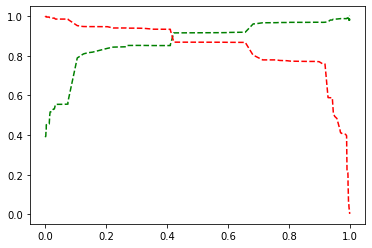

In [348]:
plt.plot(thresholds, p [:-1],'g--')
plt.plot(thresholds, r [:-1], 'r--')
plt.show ()

Below are the evaluated metrics for the training set

1. Accuracy - 91.21%
2. Sensitivity/Recall - 86.88%
3. Specificity - 95.08%
4. Precision - 91.71%


### Predictions on test set


In [349]:
# Here we are using trade off obtained from sensitivity specificity trade off which is 0.43
x_test = x_test[col]
x_test.head()

,Do Not Email,Lead Source_Welingak Website,Last Activity_SMS Sent,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Quality_Not Sure,Lead Quality_Worst
3271,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1490,0,0,0,0,0,1,0,0,0,0,1,0,0,0
7936,0,0,0,0,0,0,0,0,0,0,1,0,1,0
4216,0,0,0,1,0,0,0,1,0,0,0,0,0,0
3830,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [350]:
x_test_sm = sm.add_constant(x_test)
y_test_pred = res.predict(x_test_sm)

In [351]:
y_test_pred.head()

3271    0.074837
1490    0.957968
7936    0.074837
4216    0.993084
3830    0.074837
dtype: float64

In [352]:
y_test_Pred = pd.DataFrame(y_test_pred)

In [353]:
y_test_Pred.head()

,0
3271,0.074837
1490,0.957968
7936,0.074837
4216,0.993084
3830,0.074837


In [354]:
y_test_df = pd.DataFrame(y_test)

In [355]:
y_test_Pred.reset_index(drop=True,inplace=True)
y_test_df.reset_index(drop=True,inplace=True)

In [356]:
y_pred_final = pd.concat([y_test_Pred,y_test_df],axis=1)

In [357]:
y_pred_final = y_pred_final.rename(columns={0:'Conversion_Prob'})

In [358]:
y_pred_final = y_pred_final.reindex(['Converted','Conversion_Prob'],axis=1)

In [359]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x>0.43 else 0)

In [360]:
y_pred_final['Lead Score'] = y_pred_final.Conversion_Prob.map(lambda x: round(x*100))

In [361]:
y_pred_final.head()

,Converted,Conversion_Prob,final_predicted,Lead Score
0,0,0.074837,0,7
1,1,0.957968,1,96
2,0,0.074837,0,7
3,1,0.993084,1,99
4,0,0.074837,0,7


In [362]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred_final.Converted,y_pred_final.final_predicted)
cm

array([[1636,   98],
       [ 141,  848]], dtype=int64)

In [363]:
TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]

In [364]:
sens = TP/float(TP+FN)
sens

0.8574317492416582

In [365]:
spec = TN/float(TN+FP)
spec

0.9434832756632064

In [366]:
precision = precision = TP/(TP+FP)
precision

0.8964059196617337

In [367]:
print(metrics.accuracy_score(y_pred_final.Converted,y_pred_final.final_predicted))

0.9122291590157914


Metrics evaluated for test set
     1. Accuracy - 91.22%
     2. Sensitivity/Recall - 85.74%
     3. Specificity - 94.35%
     4. Precision - 89.64%

In [368]:
result_df = y_pred_final.sort_values(by='Lead Score',ascending=False)
Result_filter = result_df.loc[result_df['Lead Score'] >= 43]
print(result_df.shape)
print(Result_filter.shape)

(2723, 4)
(946, 4)


In [369]:
Conversion_Rate_final= (sum(Result_filter['Converted'])/len(Result_filter['Converted'].index))*100
Conversion_Rate_final

89.64059196617336

In [370]:
Hot_Leads = result_df.loc[result_df['Lead Score'] >= 95]
Hot_Leads.shape

(480, 4)

In [371]:
Conversion_Rate_final= (sum(Hot_Leads['Converted'])/len(Hot_Leads['Converted'].index))*100
Conversion_Rate_final

98.75

It is inferred that the conversion rate of leads into clients is 98.75%

## Conclusion

#### 1.Final Model of Logistic regression is built with the following 14 features including constant.
     - Tags_Will revert after reading the email,
     - What is your current occupation_Unemployed,
     - Lead Quality_Not Sure,Tags_Ringing,
     - Lead Quality_Worst,
     - What is your current occupation_Working Profession,
     - Tags_Closed by Horizzon,
     - What is your current occupation_Student,
     - Tags_switched off,
     - Last Activity_SMS Sent,
     - Tags_Busy,
     - Tags_Lost to EINS,
     - Lead Source_Welingak Website,
     - Do Not Email

#### 2.Optimum cutoff chosen for the above model is 0.43, which means any leads with probability conversion of greater than 0.43 is predicted as hot leads.

#### 3.The top 3 variables are 
       1. Tags_Lost to EINS - coeff 10.3302
       2. Tags_Closed by Horizzon	- coeff 7.7179
       3. Tags_Will revert after reading the email - coeff 4.9439
       
#### 4. Evaluated metrics for train set
        1. Accuracy - 91.21%
        2. Sensitivity/Recall - 86.88%
        3. Specificity - 95.08%
        4. Precision - 91.71%

#### 5. Evaluated metris for test set
       1. Accuracy - 91.22%
       2. Sensitivity/Recall - 85.74%
       3. Specificity - 94.35%
       4. Precision - 89.64%